In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "../Data"   # folder ignored by git
PRICE_SCALE = 10_000
LEVELS = 10


In [28]:
# Example filenames (adjust if needed)
msg_path = f"{DATA_DIR}/GOOG_2012-06-21_34200000_57600000_message_10.csv"
ob_path  = f"{DATA_DIR}/GOOG_2012-06-21_34200000_57600000_orderbook_10.csv"

# Message columns (LOBSTER standard)
msg_cols = ["time", "type", "order_id", "size", "price", "direction"]
msg = pd.read_csv(msg_path, names=msg_cols)

# Orderbook columns: ask_p1, ask_s1, bid_p1, bid_s1, ..., up to LEVELS
ob_cols = []
for lvl in range(1, LEVELS + 1):
    ob_cols += [f"ask_p{lvl}", f"ask_s{lvl}", f"bid_p{lvl}", f"bid_s{lvl}"]
ob = pd.read_csv(ob_path, names=ob_cols)

# Merge (same number of rows; row i message ↔ row i orderbook post-event)
df = pd.concat([msg, ob], axis=1)

# Use time as index (seconds since midnight)
df = df.set_index("time").sort_index()
df.head()


,type,order_id,size,price,direction,ask_p1,ask_s1,bid_p1,bid_s1,ask_p2,...,bid_p8,bid_s8,ask_p9,ask_s9,bid_p9,bid_s9,ask_p10,ask_s10,bid_p10,bid_s10
time,,,,,,,,,,,,,,,,,,,,,
34200.015105,4,15818974,4,5794000,1,5802300,100,5794000,496,5804300,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
34200.059902,4,15818974,300,5794000,1,5802300,100,5794000,196,5804300,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
34200.113247,5,0,1,5795100,1,5802300,100,5794000,196,5804300,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
34200.113247,5,0,1,5795000,1,5802300,100,5794000,196,5804300,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
34200.113247,5,0,1,5794900,1,5802300,100,5794000,196,5804300,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100


In [29]:
df["mid_d"] = (df["ask_p1"] + df["bid_p1"]) / (2 * PRICE_SCALE)
df["spread_d"] = (df["ask_p1"] - df["bid_p1"]) / PRICE_SCALE

den = (df["bid_s1"] + df["ask_s1"]).replace(0, np.nan)
df["micro_d"] = (df["ask_p1"] * df["bid_s1"] + df["bid_p1"] * df["ask_s1"]) / den / PRICE_SCALE
df["imbalance_l1"] = (df["bid_s1"] - df["ask_s1"]) / den
df


,type,order_id,size,price,direction,ask_p1,ask_s1,bid_p1,bid_s1,ask_p2,...,bid_p9,bid_s9,ask_p10,ask_s10,bid_p10,bid_s10,mid_d,spread_d,micro_d,imbalance_l1
time,,,,,,,,,,,,,,,,,,,,,
34200.015105,4,15818974,4,5794000,1,5802300,100,5794000,496,5804300,...,5732000,20,5892600,100,5700000,100,579.815,0.83,580.090738,0.664430
34200.059902,4,15818974,300,5794000,1,5802300,100,5794000,196,5804300,...,5732000,20,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324
34200.113247,5,0,1,5795100,1,5802300,100,5794000,196,5804300,...,5732000,20,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324
34200.113247,5,0,1,5795000,1,5802300,100,5794000,196,5804300,...,5732000,20,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324
34200.113247,5,0,1,5794900,1,5802300,100,5794000,196,5804300,...,5732000,20,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57599.544132,1,287157290,300,5655600,-1,5652200,42,5651200,200,5655000,...,5649200,300,5657500,100,5649100,100,565.170,0.10,565.202645,0.652893
57599.544133,1,287157291,200,5655600,-1,5652200,42,5651200,200,5655000,...,5649200,300,5657500,100,5649100,100,565.170,0.10,565.202645,0.652893
57599.544133,1,287157292,300,5655600,-1,5652200,42,5651200,200,5655000,...,5649200,300,5657500,100,5649100,100,565.170,0.10,565.202645,0.652893


In [30]:
b_p = df["bid_p1"]
b_q = df["bid_s1"]
a_p = df["ask_p1"]
a_q = df["ask_s1"]

b_p_prev = b_p.shift(1)
b_q_prev = b_q.shift(1)
a_p_prev = a_p.shift(1)
a_q_prev = a_q.shift(1)

bid_contrib = np.where(
    b_p > b_p_prev, b_q,
    np.where(b_p == b_p_prev, b_q - b_q_prev, -b_q_prev)
)

ask_contrib = np.where(
    a_p < a_p_prev, -a_q,
    np.where(a_p == a_p_prev, -(a_q - a_q_prev), +a_q_prev)
)

df["ofi_l1"] = bid_contrib + ask_contrib

depth = (df["bid_s1"] + df["ask_s1"]).replace(0, np.nan)
df["ofi_l1_norm"] = df["ofi_l1"] / depth
df.head(10)


,type,order_id,size,price,direction,ask_p1,ask_s1,bid_p1,bid_s1,ask_p2,...,ask_p10,ask_s10,bid_p10,bid_s10,mid_d,spread_d,micro_d,imbalance_l1,ofi_l1,ofi_l1_norm
time,,,,,,,,,,,,,,,,,,,,,
34200.015105,4,15818974,4,5794000,1,5802300,100,5794000,496,5804300,...,5892600,100,5700000,100,579.815,0.83,580.090738,0.664430,NaN,NaN
34200.059902,4,15818974,300,5794000,1,5802300,100,5794000,196,5804300,...,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324,-300.0,-1.013514
34200.113247,5,0,1,5795100,1,5802300,100,5794000,196,5804300,...,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324,0.0,0.000000
34200.113247,5,0,1,5795000,1,5802300,100,5794000,196,5804300,...,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324,0.0,0.000000
34200.113247,5,0,1,5794900,1,5802300,100,5794000,196,5804300,...,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324,0.0,0.000000
34200.113247,5,0,1,5794800,1,5802300,100,5794000,196,5804300,...,5892600,100,5700000,100,579.815,0.83,579.949595,0.324324,0.0,0.000000
34200.113247,4,15818974,167,5794000,1,5802300,100,5794000,29,5804300,...,5892600,100,5700000,100,579.815,0.83,579.586589,-0.550388,-167.0,-1.294574
34200.154178,1,16155653,100,5794000,1,5802300,100,5794000,129,5804300,...,5892600,100,5700000,100,579.815,0.83,579.867555,0.126638,100.0,0.436681
34200.173594,1,16160421,100,5791200,1,5802300,100,5794000,129,5804300,...,5892600,100,5732000,20,579.815,0.83,579.867555,0.126638,0.0,0.000000


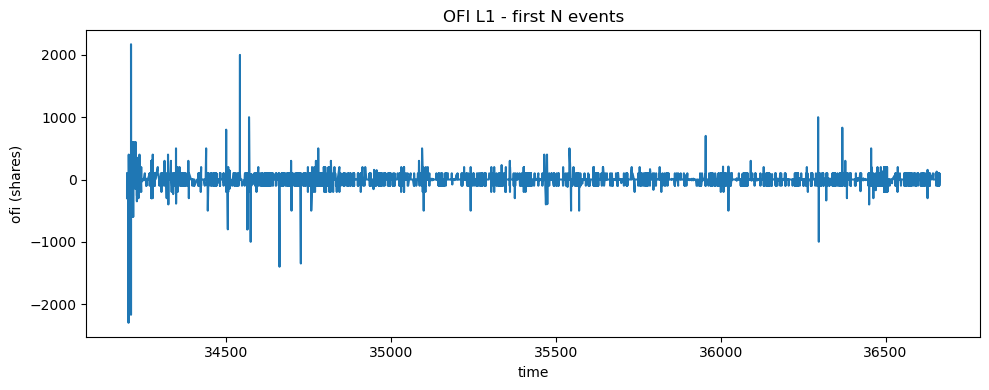

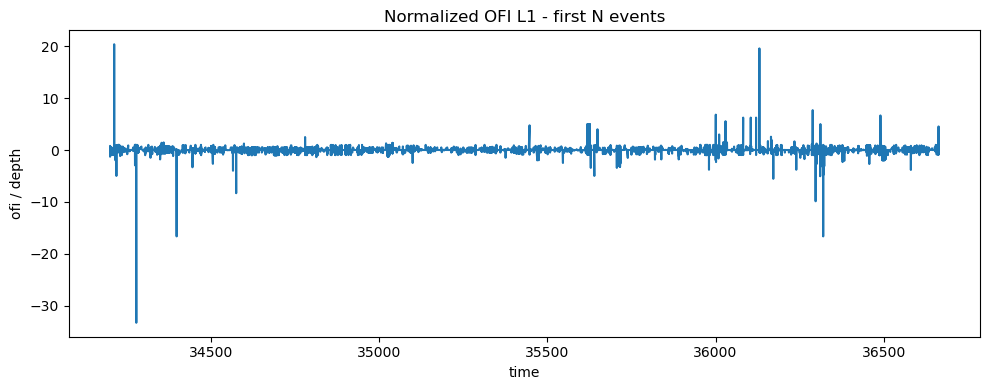

In [31]:
N = 20_000

fig, ax = plt.subplots(figsize=(10, 4))
df["ofi_l1"].iloc[:N].plot(ax=ax)
ax.set_title("OFI L1 - first N events")
ax.set_xlabel("time")
ax.set_ylabel("ofi (shares)")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
df["ofi_l1_norm"].iloc[:N].plot(ax=ax)
ax.set_title("Normalized OFI L1 - first N events")
ax.set_xlabel("time")
ax.set_ylabel("ofi / depth")
fig.tight_layout()
plt.show()


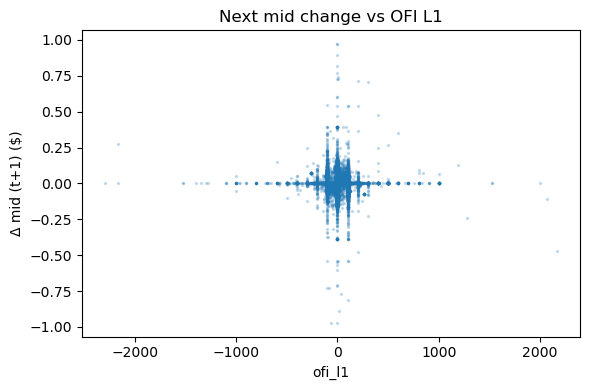

In [32]:
M = 200_000
tmp = df.iloc[:M].copy()
tmp["dmid_1"] = tmp["mid_d"].shift(-1) - tmp["mid_d"]

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(tmp["ofi_l1"], tmp["dmid_1"], s=2, alpha=0.2)
ax.set_title("Next mid change vs OFI L1")
ax.set_xlabel("ofi_l1")
ax.set_ylabel("Δ mid (t+1) ($)")
fig.tight_layout()
plt.show()

/var/folders/vy/2xpqhdt91dl76cnvzvk4ydgr0000gn/T/ipykernel_54748/1860058062.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = tmp.groupby("bin")["dmid_1"].mean()


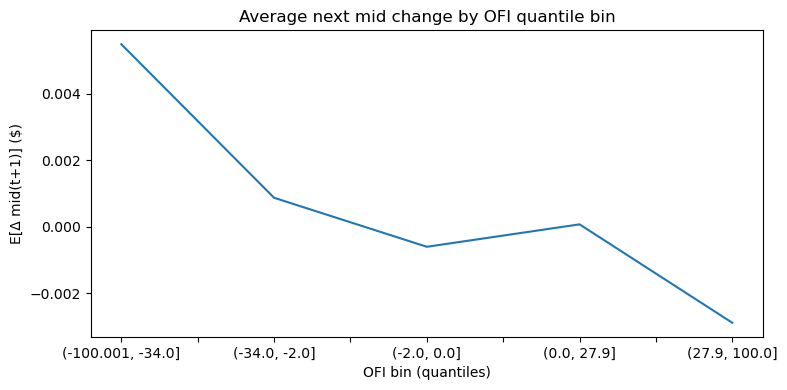

In [33]:
tmp = df[["ofi_l1", "mid_d"]].copy()
tmp["dmid_1"] = tmp["mid_d"].shift(-1) - tmp["mid_d"]

# taglia outlier (opzionale ma aiuta)
q1, q99 = tmp["ofi_l1"].quantile([0.01, 0.99])
tmp = tmp[(tmp["ofi_l1"] >= q1) & (tmp["ofi_l1"] <= q99)]

tmp["bin"] = pd.qcut(tmp["ofi_l1"], 20, duplicates="drop")
binned = tmp.groupby("bin")["dmid_1"].mean()

fig, ax = plt.subplots(figsize=(8,4))
binned.plot(ax=ax)
ax.set_title("Average next mid change by OFI quantile bin")
ax.set_xlabel("OFI bin (quantiles)")
ax.set_ylabel("E[Δ mid(t+1)] ($)")
plt.tight_layout()
plt.show()
